<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sección 6 – Implementación del PCA al conjunto de Iris

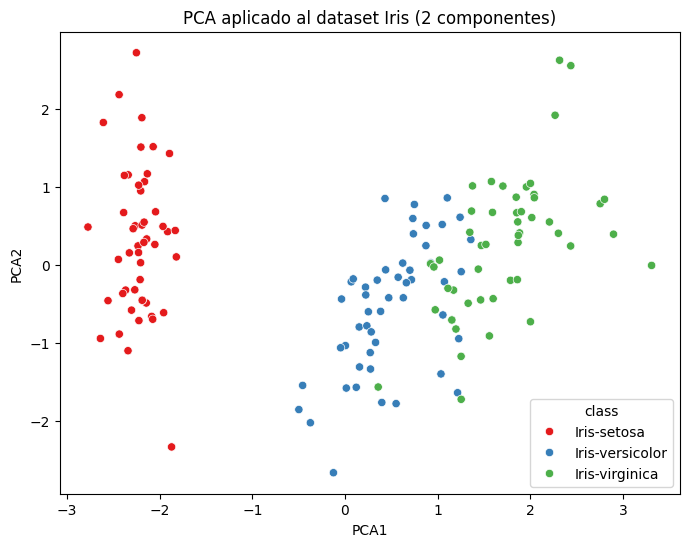

Varianza por componente: [0.72770452 0.23030523]
Varianza acumulada: 0.9580097536148199


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

col_names = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df_iris = pd.read_csv("iris.data", header=None, names=col_names)

X = df_iris.iloc[:, :-1].values
y = df_iris["class"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=["PCA1","PCA2"])
df_plot["class"] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="PCA1", y="PCA2", hue="class", palette="Set1")
plt.title("PCA aplicado al dataset Iris (2 componentes)")
plt.show()

print("Varianza por componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.sum())

Sección 8 – Dataset MNIST. Aplicar PCA preservando 95% de varianza

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("mnist_version_corta.csv")

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Componentes necesarios para 95% varianza:", pca.n_components_)


Componentes necesarios para 95% varianza: 280


Comparación de tamaños

In [10]:
print("Tamaño original:", X.shape)
print("Tamaño reducido:", X_pca.shape)


Tamaño original: (9999, 784)
Tamaño reducido: (9999, 280)


Reconstrucción de imágenes

In [11]:
X_reconstructed = pca.inverse_transform(X_pca)

Gráficas de 10 dígitos originales vs reconstruidos

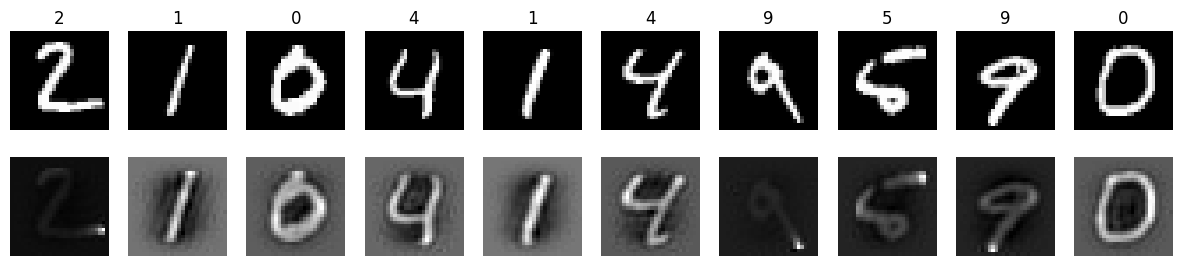

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 10, figsize=(15,3))
for i in range(10):
    # Original
    axes[0,i].imshow(X[i].reshape(28,28), cmap="gray")
    axes[0,i].set_title(str(y[i]))
    axes[0,i].axis("off")
    # Reconstruido
    axes[1,i].imshow(X_reconstructed[i].reshape(28,28), cmap="gray")
    axes[1,i].axis("off")
plt.show()


Cálculo del MSE

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X, X_reconstructed)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 7318.41827499581


Curva de error de reconstrucción

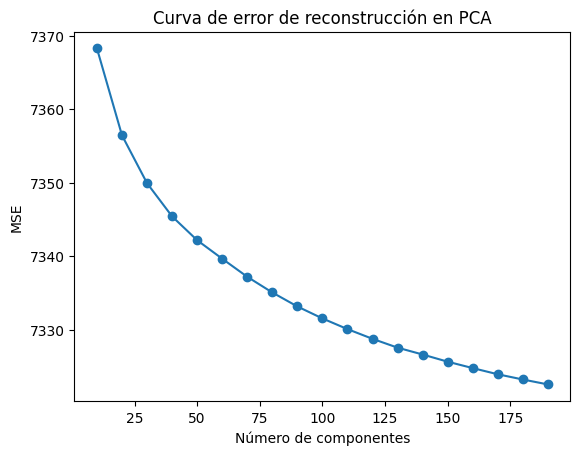

In [16]:
errors = []
components = range(10, 200, 10)
for k in components:
    pca_temp = PCA(n_components=k)
    X_pca_temp = pca_temp.fit_transform(X_scaled)
    X_rec_temp = pca_temp.inverse_transform(X_pca_temp)
    errors.append(mean_squared_error(X, X_rec_temp))

plt.plot(components, errors, marker="o")
plt.xlabel("Número de componentes")
plt.ylabel("MSE")
plt.title("Curva de error de reconstrucción en PCA")
plt.show()


PCA con 1000 dígitos

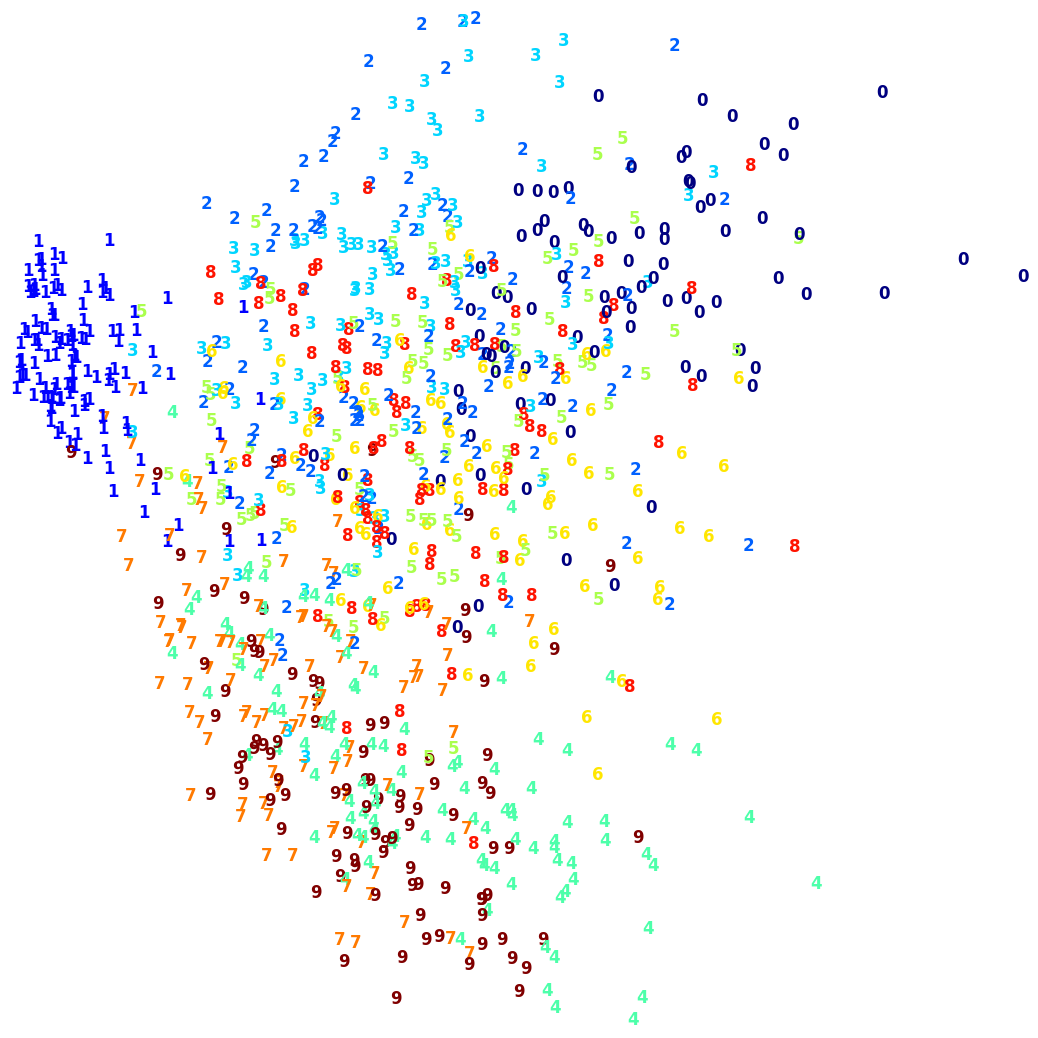

In [36]:
from graficar_digitos import graficar_digitos
y_subset = y[:1000]
X_subset = X[:1000]

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_subset)

graficar_digitos(X_pca2, y_subset, mostrar_scatter=False,
                 mostrar_texto=True, mostrar_imagenes=False)


PCA con todos los dígitos

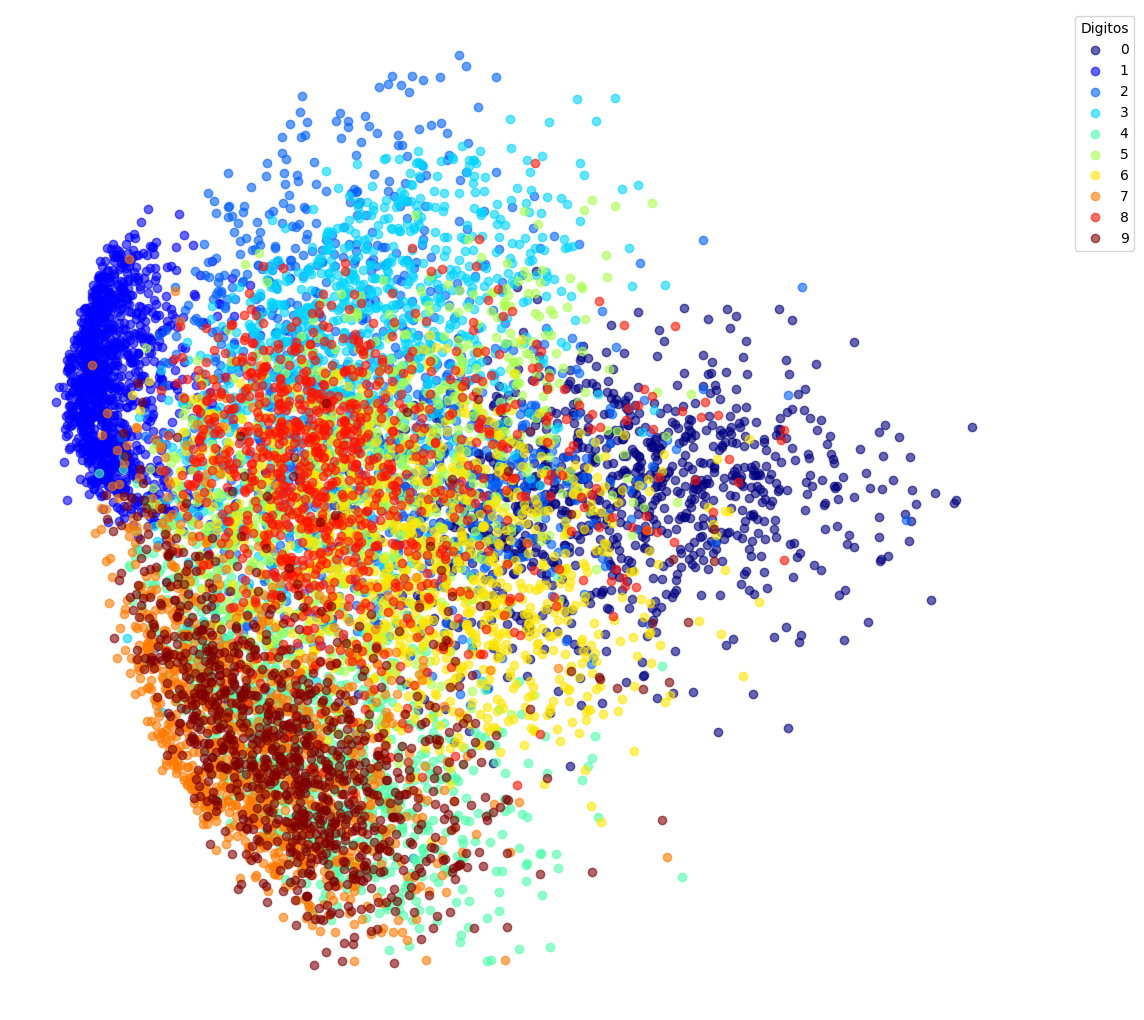

In [37]:
X_pca_full = PCA(n_components=2).fit_transform(X)
graficar_digitos(X_pca_full, y, mostrar_scatter=True,
                 mostrar_texto=False, mostrar_imagenes=False)

Anexo.Codigo puntos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def graficar_digitos(X, y, min_distancia=0.001, mostrar_scatter=True, mostrar_texto=True, mostrar_imagenes=False, imagenes=None, figsize=(13, 13)):

    # Escalar las coordenadas a [0,1] para que todo quede en un rango uniforme
    X_normalizado = MinMaxScaler().fit_transform(X)

    # Lista de coordenadas ya ocupadas (para evitar superposición)
    vecinos = np.array([[10., 10.]])

    # Crear figura
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digitos = np.unique(y)

    # Dibujar scatter por clase
    if mostrar_scatter:
        for digito in digitos:
            plt.scatter(X_normalizado[y == digito, 0],
                        X_normalizado[y == digito, 1],
                        c=[cmap(digito / 9)],
                        alpha=0.6, label=str(digito))

    plt.axis("off")
    ax = plt.gca()

    # Dibujar textos o imágenes
    for indice, coord in enumerate(X_normalizado):
        distancia_min = np.linalg.norm(np.array(vecinos) - coord, axis=1).min()
        if distancia_min > min_distancia:
            vecinos = np.r_[vecinos, [coord]]

            if mostrar_imagenes and imagenes is not None:
                # Mostrar miniatura
                imagen = imagenes[indice].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(imagen, cmap="binary"), coord)
                ax.add_artist(imagebox)

            elif mostrar_texto:
                # Mostrar número
                plt.text(coord[0], coord[1], str(int(y[indice])),
                         color=cmap(y[indice] / 9),
                         fontdict={"weight": "bold", "size": 12})

    if mostrar_scatter:
        plt.legend(title="Digitos", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

